In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('runtimes.csv', delimiter=";")
print(df)

step_order = ['lint', 'test', 'build']
df['step'] = pd.Categorical(df['step'], categories=step_order, ordered=True)

     step_id  pipeline_id       tool     language   step  total_duration  \
0          1            1  concourse        flask   lint              46   
1          2            1  concourse        flask   test              46   
2          3            1  concourse        flask  build              46   
3          4            2  concourse        flask   lint              45   
4          5            2  concourse        flask   test              45   
..       ...          ...        ...          ...    ...             ...   
175      176           59    jenkins  spring-boot   test              40   
176      177           59    jenkins  spring-boot  build              40   
177      178           60    jenkins  spring-boot   lint              39   
178      179           60    jenkins  spring-boot   test              39   
179      180           60    jenkins  spring-boot  build              39   

     step_duration  
0               17  
1                9  
2               20  
3  

In [4]:
# Longest and shortest step
max_duration_step = df[df['step_duration'] == df['step_duration'].max()]
print("Step with the longest duration\n", max_duration_step)
print("\n")
min_duration_step = df[df['step_duration'] == df['step_duration'].min()]
print("Step with the shortest duration\n", min_duration_step)

Step with the longest duration
     step_id  pipeline_id       tool language   step  total_duration  \
50       51           17  concourse    vuejs  build             139   

    step_duration  
50             95  


Step with the shortest duration
      step_id  pipeline_id     tool language   step  total_duration  \
116      117           39  jenkins    flask  build              58   

     step_duration  
116              6  


In [5]:
# Step duration > 80
step_duration_over_80 = df[df['step_duration'] > 80]
print("Steps with duration > 80\n", step_duration_over_80)

Steps with duration > 80
     step_id  pipeline_id       tool language   step  total_duration  \
30       31           11  concourse    vuejs   lint             143   
34       35           12  concourse    vuejs   test             146   
37       38           13  concourse    vuejs   test             142   
40       41           14  concourse    vuejs   test             142   
43       44           15  concourse    vuejs   test             139   
45       46           16  concourse    vuejs   lint             141   
50       51           17  concourse    vuejs  build             139   
51       52           18  concourse    vuejs   lint             138   
54       55           19  concourse    vuejs   lint             141   
57       58           20  concourse    vuejs   lint             140   

    step_duration  
30             82  
34             86  
37             85  
40             85  
43             85  
45             82  
50             95  
51             82  
54          

<Axes: title={'center': 'Step duration histogram'}, xlabel='Step duration [s]', ylabel='Frequency'>

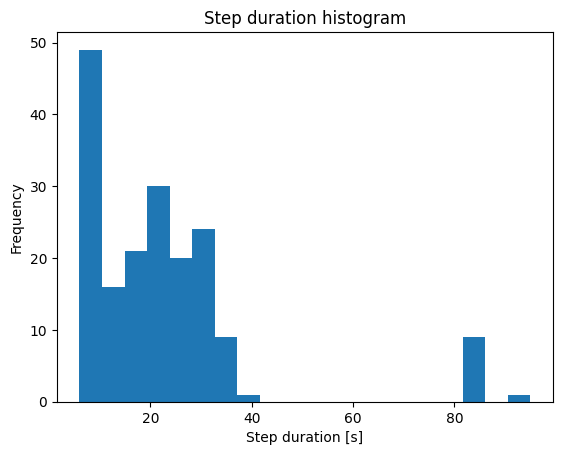

In [6]:
# Histogram
df['step_duration'].plot(kind='hist', bins=20, title='Step duration histogram', ylabel='Frequency', xlabel='Step duration [s]')

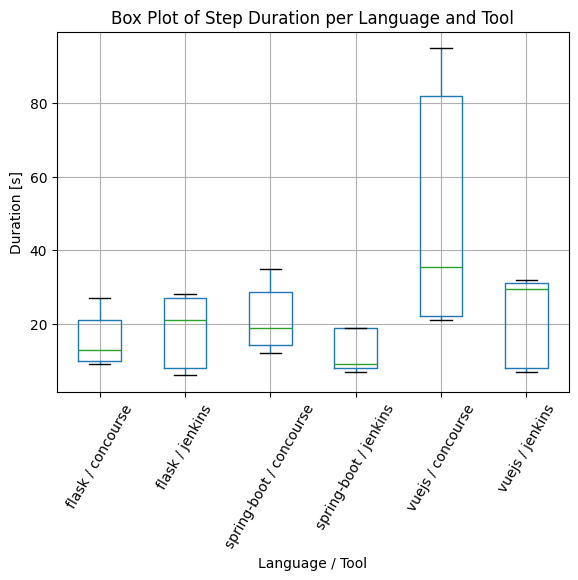

In [7]:
# Box plot of duration per language and tool
df['language_tool'] = df['language'] + ' / ' + df['tool']
df.boxplot(column='step_duration', by='language_tool')
plt.ylabel('Duration [s]')
plt.xlabel('Language / Tool')
plt.title('Box Plot of Step Duration per Language and Tool')
plt.suptitle('')
plt.xticks(rotation=60)
plt.show()

/var/folders/2q/5rj1x79d5njg41wk1sdjfx5m0000gp/T/ipykernel_50134/4060630200.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_duration_steptype = df.groupby(['step'])['step_duration'].mean()


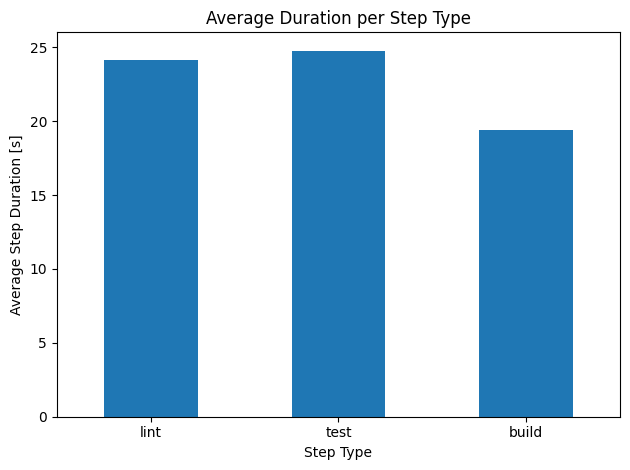

In [8]:
# Average step duration per step type
avg_duration_steptype = df.groupby(['step'])['step_duration'].mean()

avg_duration_steptype.plot(kind='bar')
plt.ylabel('Average Step Duration [s]')
plt.xlabel('Step Type')
plt.title('Average Duration per Step Type')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

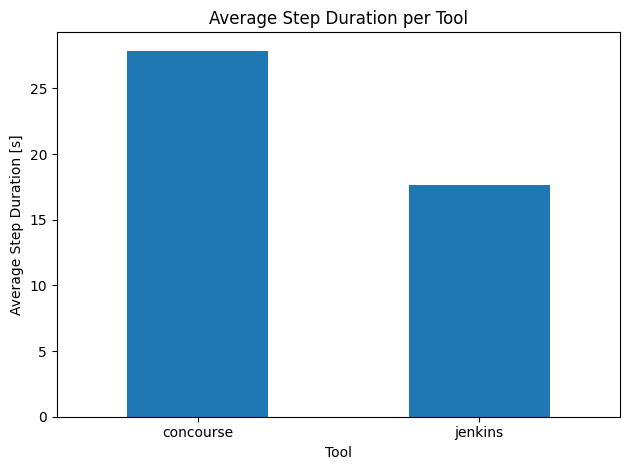

In [9]:
# Calculate average step duration per tool
avg_step_duration_tool = df.groupby(['tool'])['step_duration'].mean()

avg_step_duration_tool.plot(kind='bar')
plt.ylabel('Average Step Duration [s]')
plt.xlabel('Tool')
plt.title('Average Step Duration per Tool')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

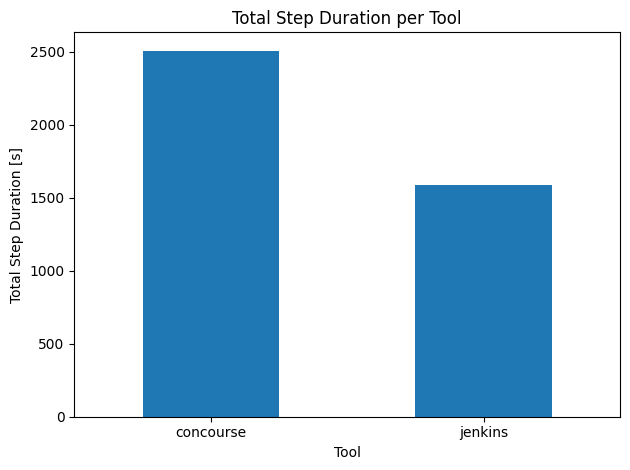

In [10]:
# Calculate total step duration per tool
total_step_duration_tool = df.groupby(['tool'])['step_duration'].sum()

total_step_duration_tool.plot(kind='bar')
plt.ylabel('Total Step Duration [s]')
plt.xlabel('Tool')
plt.title('Total Step Duration per Tool')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

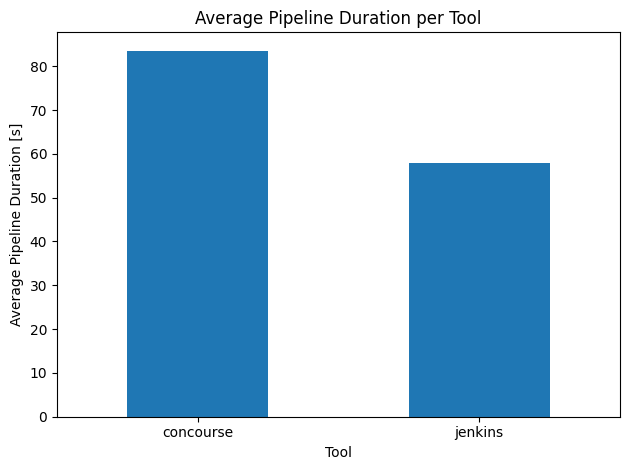

In [11]:
# Calculate average duration of pipeline per tool
avg_pipeline_duration_tool = df.groupby(['tool', 'pipeline_id'])['total_duration'].max().groupby(['tool']).mean()

avg_pipeline_duration_tool.plot(kind='bar')
plt.ylabel('Average Pipeline Duration [s]')
plt.xlabel('Tool')
plt.title('Average Pipeline Duration per Tool')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

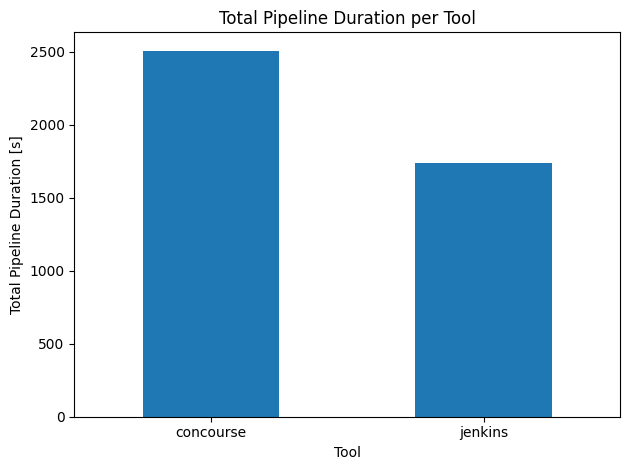

In [12]:
# Calculate total duration of pipelines per tool
total_pipeline_duration_tool = df.groupby(['tool', 'pipeline_id'])['total_duration'].first().groupby(['tool']).sum()

total_pipeline_duration_tool.plot(kind='bar')
plt.ylabel('Total Pipeline Duration [s]')
plt.xlabel('Tool')
plt.title('Total Pipeline Duration per Tool')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

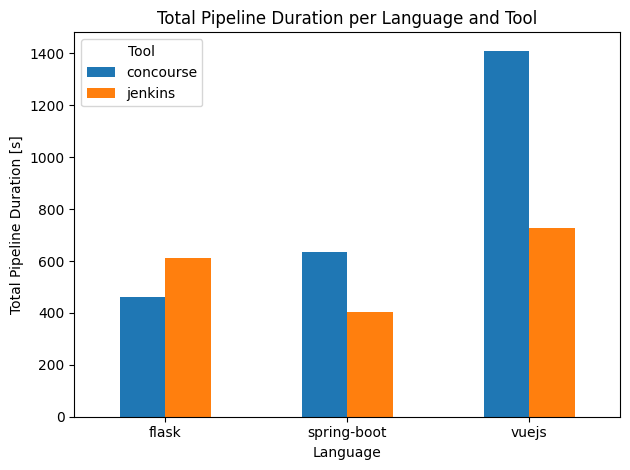

In [13]:
# Calculate total duration per language and tool
total_pipeline_duration_lang_tool = df.groupby(['language', 'tool', 'pipeline_id'])['total_duration'].first().groupby(['language', 'tool']).sum()

total_pipeline_duration_lang_tool.unstack().plot(kind='bar')
plt.ylabel('Total Pipeline Duration [s]')
plt.xlabel('Language')
plt.title('Total Pipeline Duration per Language and Tool')
plt.legend(title='Tool')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/var/folders/2q/5rj1x79d5njg41wk1sdjfx5m0000gp/T/ipykernel_50134/347497471.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_duration_step_tool = df.groupby(['step', 'tool'])['step_duration'].sum()


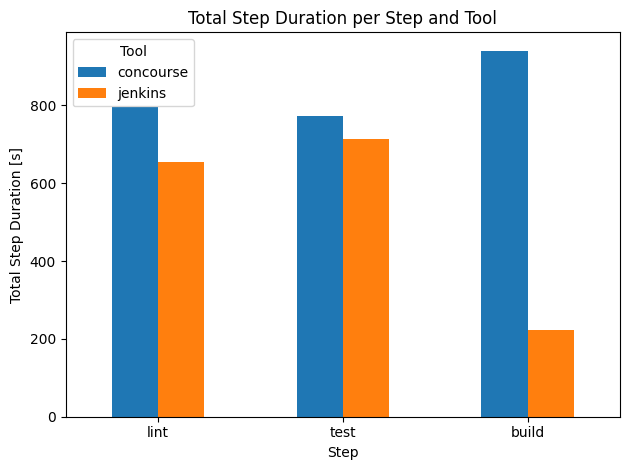

In [14]:
# Calculate total duration per step and tool
total_duration_step_tool = df.groupby(['step', 'tool'])['step_duration'].sum()

total_duration_step_tool.unstack().plot(kind='bar')
plt.ylabel('Total Step Duration [s]')
plt.xlabel('Step')
plt.title('Total Step Duration per Step and Tool')
plt.xticks(rotation=0)
plt.legend(title='Tool')
plt.tight_layout()
plt.show()

/var/folders/2q/5rj1x79d5njg41wk1sdjfx5m0000gp/T/ipykernel_50134/442332666.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_duration_step_language = df.groupby(['step', 'language'])['step_duration'].sum()


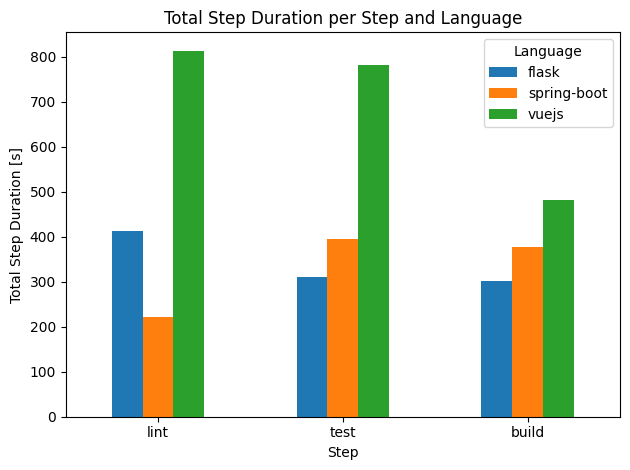

In [15]:
# Calculate total duration per step and language
total_duration_step_language = df.groupby(['step', 'language'])['step_duration'].sum()

total_duration_step_language.unstack().plot(kind='bar')
plt.ylabel('Total Step Duration [s]')
plt.xlabel('Step')
plt.title('Total Step Duration per Step and Language')
plt.xticks(rotation=0)
plt.legend(title='Language')
plt.tight_layout()
plt.show()

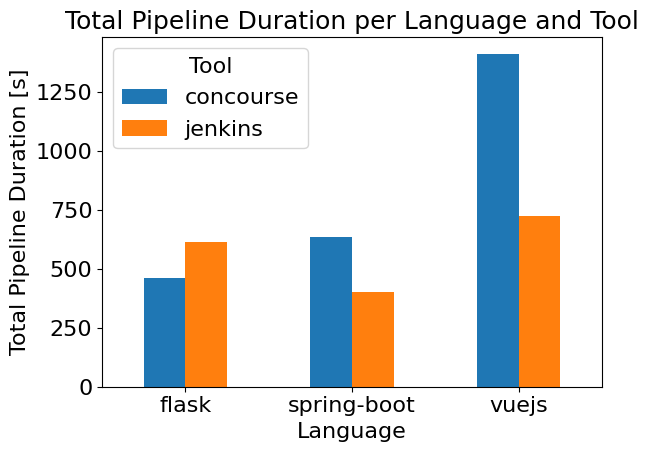

In [19]:
# Calculate total duration per language and tool - poster
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 18, 'xtick.labelsize': 16, 'ytick.labelsize': 16})
total_pipeline_duration_lang_tool_poster = df.groupby(['language', 'tool', 'pipeline_id'])['total_duration'].first().groupby(['language', 'tool']).sum()

total_pipeline_duration_lang_tool_poster.unstack().plot(kind='bar')
plt.ylabel('Total Pipeline Duration [s]')
plt.xlabel('Language')
plt.title('Total Pipeline Duration per Language and Tool')
plt.legend(title='Tool')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()